# 主要的文件
# TODO 把时间处理之后统一成一种，比如统一成:日期表示当日收盘前的情况
eg.现在写的2020.5.21，发布时间为当日收盘后，则改为2020.5.22

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
input_path='./01_数据input/'

In [3]:
df_all=pd.read_excel(input_path+'各类货币政策!_预处理后.xls',index_col=0).iloc[3:-2]
df_all.index=pd.DatetimeIndex(df_all.index)
df_all=df_all['2010':]
df_all;

In [4]:
lr=df_all.iloc[:,1:2].dropna()
lr-lr.shift(1);

In [5]:
df_all['人民币存款准备金率:中小型存款类金融机构(变动日期)'].dropna();

In [6]:
def drop_repeat(one_col):
    one_col=df_all[col].dropna()
    need=one_col[one_col!=one_col.shift(1)]
    return need

In [7]:
dic={}
for col in df_all.columns[1:-1]:
    a=df_all[col].dropna()  # 去掉空行
    a=drop_repeat(a)
    if len(a)==0:
        continue# 去掉无数据的指标
    dic[col]=a
# dic

In [8]:
dic.keys()

dict_keys(['定期存款利率:1年(整存整取)', '短期贷款利率:6个月至1年(含)', '人民银行对金融机构存款利率:超额准备金', '贷款市场报价利率(LPR):1年', '贷款市场报价利率(LPR):5年', '人民币存款准备金率:中小型存款类金融机构(变动日期)', '人民币存款准备金率:大型存款类金融机构(变动日期)', '逆回购利率:7天', '逆回购利率:14天', '逆回购利率:28天', '逆回购利率:63天', '逆回购利率:21天', '常备借贷便利(SLF)利率:隔夜', '常备借贷便利(SLF)利率:7天', '常备借贷便利(SLF)利率:1个月', 'SLO投放利率', 'SLO回笼利率', '中期借贷便利(MLF):利率:3个月', '中期借贷便利(MLF):利率:6个月', '中期借贷便利(MLF):利率:1年', '定向中期借贷便利(TMLF):利率', '央行票据:发行利率:3个月', '央行票据:发行利率:1年期', '央行票据:发行利率:3年期'])

In [9]:
df_time=pd.DataFrame([v.index for k,v in dic.items()]).T
df_time.T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,2010-10-20,2010-12-26,2011-02-09,2011-04-06,2011-07-07,2012-06-08,2012-07-06,2014-11-22,2015-03-01,2015-05-11,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2010-10-20,2010-12-26,2011-02-09,2011-04-06,2011-07-07,2012-06-08,2012-07-06,2014-11-22,2015-03-01,2015-05-11,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2020-04-07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2013-10-25,2013-10-28,2013-11-19,2014-02-13,2014-02-14,2014-04-01,2014-06-17,2014-11-24,2014-11-27,2014-11-28,...,2020-02-20,2020-04-20,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2019-08-20,2019-11-20,2020-02-20,2020-04-20,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,2010-01-18,2010-02-25,2010-05-10,2010-11-16,2010-11-29,2010-12-20,2011-01-20,2011-02-24,2011-03-25,2011-04-21,...,2016-03-01,2018-04-25,2018-07-05,2018-10-15,2019-01-15,2019-01-25,2019-09-16,2020-01-06,2020-04-15,2020-05-15
6,2010-01-18,2010-02-25,2010-05-10,2010-11-16,2010-11-29,2010-12-20,2011-01-20,2011-02-24,2011-03-25,2011-04-21,...,2016-03-01,2018-04-25,2018-07-05,2018-10-15,2019-01-15,2019-01-25,2019-09-16,2020-01-06,NaT,NaT
7,2012-05-03,2012-05-10,2012-07-03,2012-07-05,2012-07-10,2012-07-19,2012-08-21,2012-09-06,2013-07-30,2013-08-06,...,2015-06-30,2015-08-27,2015-10-27,2017-02-03,2017-03-16,2017-12-14,2018-03-22,2019-11-18,2020-02-03,2020-03-30
8,2012-01-17,2012-01-19,2012-06-26,2012-06-28,2012-07-03,2012-07-05,2012-08-16,2012-08-28,2012-09-04,2012-09-11,...,2018-04-16,2019-12-18,2020-02-03,2020-06-18,NaT,NaT,NaT,NaT,NaT,NaT
9,2012-09-13,2015-01-27,2016-01-19,2016-09-13,2017-02-03,2017-03-16,2017-12-14,2018-05-28,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [10]:
(list(dic.values())[1]-list(dic.values())[1].shift(1)).iloc[1:]

指标名称
2010-12-26    0.25
2011-02-09    0.25
2011-04-06    0.25
2011-07-07    0.25
2012-06-08   -0.25
2012-07-06   -0.31
2014-11-22    -0.4
2015-03-01   -0.25
2015-05-11   -0.25
2015-06-28   -0.25
2015-08-26   -0.25
2015-10-24   -0.25
Name: 短期贷款利率:6个月至1年(含), dtype: object

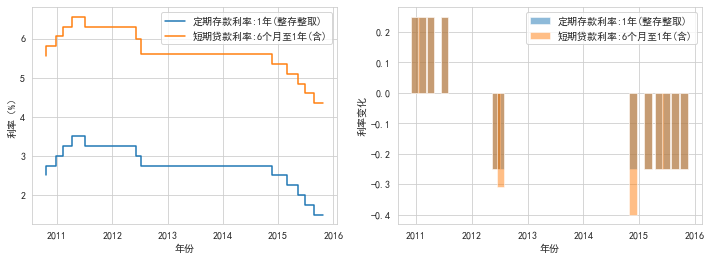

In [11]:
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def joint_plot(plot_list=(0,1)):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    for one in range(plot_list[0],plot_list[1]+1):
        plt.step(list(dic.values())[one].index,list(dic.values())[one].values)
    plt.legend(list(dic.keys())[plot_list[0]:plot_list[-1]+1]) #    
    plt.ylabel('利率（%）')
    plt.xlabel('年份')

#     plt.show()
    plt.subplot(1,2,2)

    for one in range(plot_list[0],plot_list[1]+1):
        delta=(list(dic.values())[one]-list(dic.values())[one].shift(1)).iloc[1:] # 变化值
        plt.bar(list(dic.values())[one].index[1:],delta.values,width=50,alpha=0.5)
    plt.ylabel('利率变化')
    plt.xlabel('年份')

    plt.legend(list(dic.keys())[plot_list[0]:plot_list[-1]+1]) #    
    plt.show()
joint_plot([0,1])

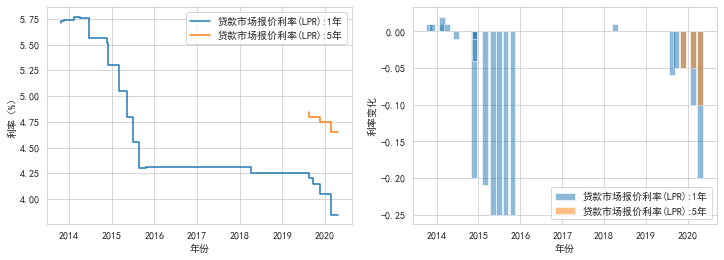

In [12]:
joint_plot([3,4])

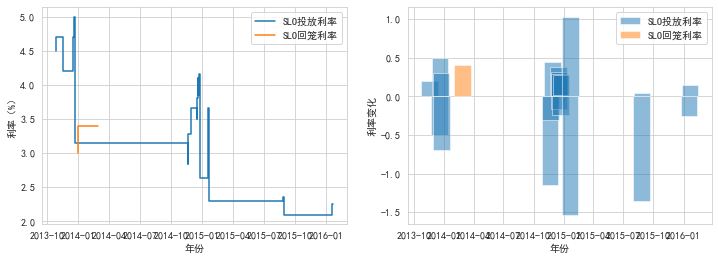

In [13]:
joint_plot([15,16])

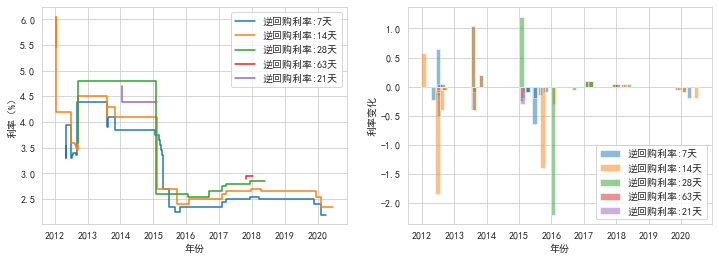

In [14]:
joint_plot([7,11])

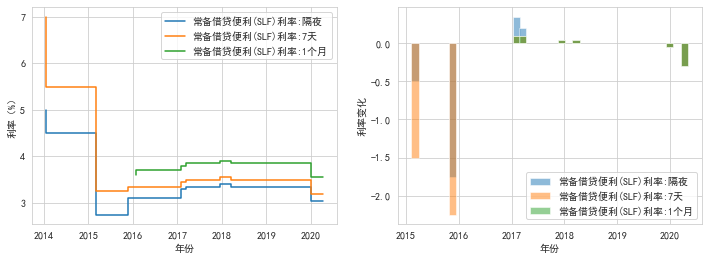

In [15]:
joint_plot([12,14])

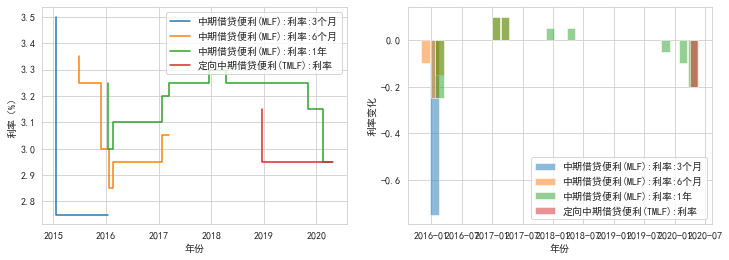

In [16]:
joint_plot([17,20])

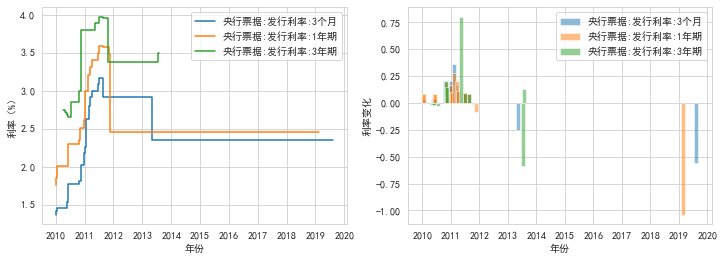

In [17]:
joint_plot([21,23])

In [18]:
dic['央行票据:发行利率:1年期']

指标名称
2010-01-05    1.7605
2010-01-12    1.8434
2010-01-19    1.9264
2010-06-01    2.0096
2010-06-08    2.0929
2010-10-26    2.2913
2010-11-09    2.3437
2010-12-28    2.5115
2011-01-04    2.6167
2011-01-11    2.7221
2011-02-15    2.9972
2011-03-15    3.1992
2011-04-07    3.3058
2011-06-21    3.4019
2011-06-28    3.4982
2011-08-16     3.584
2011-11-08    3.5733
2011-11-15    3.4875
2019-02-20      2.45
Name: 央行票据:发行利率:1年期, dtype: object

定期存款利率:1年(整存整取)
短期贷款利率:6个月至1年(含)
人民银行对金融机构存款利率:超额准备金
贷款市场报价利率(LPR):1年
贷款市场报价利率(LPR):5年
人民币存款准备金率:中小型存款类金融机构(变动日期)
人民币存款准备金率:大型存款类金融机构(变动日期)
逆回购利率:7天
逆回购利率:14天
逆回购利率:28天
逆回购利率:63天
逆回购利率:21天
常备借贷便利(SLF)利率:隔夜
常备借贷便利(SLF)利率:7天
常备借贷便利(SLF)利率:1个月
SLO投放利率
SLO回笼利率
中期借贷便利(MLF):利率:3个月
中期借贷便利(MLF):利率:6个月
中期借贷便利(MLF):利率:1年
定向中期借贷便利(TMLF):利率
央行票据:发行利率:3个月
央行票据:发行利率:1年期
央行票据:发行利率:3年期


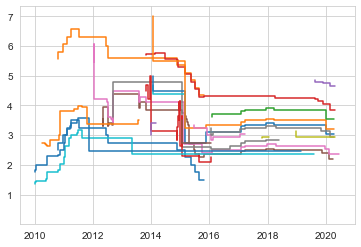

In [19]:
sns.set_style('whitegrid')
for k,v in dic.items():
    print(k)
    if k!='人民币存款准备金率:中小型存款类金融机构(变动日期)' and k!='人民币存款准备金率:大型存款类金融机构(变动日期)':
        plt.step(v.index,v.values)
#     plt.show()

## RRR


In [28]:
rrr_time='''
2010-01-12 19:00:00
2010-02-12 18:00:00
2010-05-02 18:43:27
2010-11-10 18:45:00
2010-11-19 17:59:46
2010-12-10 18:00:01
2011-01-14 17:55:26
2011-02-18 18:02:18
2011-03-18 18:20:56
2011-04-17 17:02:15
2011-05-12 18:30:02
2011-06-14 15:18:25
2011-11-30 19:03:42
2012-02-18 20:00:00
2012-05-12 19:00:00
2014-04-22 15:30:31
2014-06-09 18:51:44
2015-02-04 18:21:17
2015-04-19 17:01:07
2015-06-27 16:55:24
2015-08-25 18:15:34
2015-10-23 19:17:52
2016-02-29 18:00:00
2017-09-30 17:00:01
2018-04-17 18:26:32
2018-06-24 17:02:18
2018-10-07 11:49:46
2019-01-04 17:20:40
2019-05-06 09:29:27
2019-09-06 17:22:05
2020-01-01 15:07:56
2020-03-13 17:16:23
2020-04-03 16:57:32
'''.strip().split('\n')
rrr_time;

In [29]:
# 这函数修改了
# def adjusted_time(rrr_time,threshold='12:00:00'):
#     """
#     输入带有小时、分钟的数据，返回经过调整后的数据
#     """
#     new_rrr_time=[]
#     one_day=datetime.timedelta(days=1)
#     for one in rrr_time:
#         t=(one[-8:])
#         one_time=(datetime.datetime.strptime(one,'%Y-%m-%d %H:%M:%S'))
        
#         if t>threshold: # 如果时间为超过下午四点半，则记为下一交易日（没有加一天，是因为后面的irs处理会按照下一交易日处理）
#             # 这里不太对劲，根据发布时间，改为中午12点
#             new_rrr_time+=[one[:10]]
#     #         print(t+'==')
#         else: # 当前交易日
#             new_rrr_time+=[str(one_time-one_day)[:10]]
#     #         print(t)
#     new_rrr_time=list(set(new_rrr_time)) # 去掉重复时间
#     new_rrr_time.sort()

#     return new_rrr_time

In [37]:
def adjusted_time(rrr_time,threshold='12:00:00'):
    """
    输入带有小时、分钟的数据，返回经过调整后的数据
    """
    new_rrr_time=[]
    one_day=datetime.timedelta(days=1)
    for one in rrr_time:
        t=(one[-8:])
        one_time=(datetime.datetime.strptime(one,'%Y-%m-%d %H:%M:%S'))
        
        if t>threshold: # 如果时间为超过下午四点半，则记为下一交易日,日期加一天
            new_rrr_time+=[str(one_time+one_day)[:10]]
        else: # 当前交易日
            new_rrr_time+=[str(one_time)[:10]]
    new_rrr_time=list(set(new_rrr_time)) # 去掉重复时间
    new_rrr_time.sort()

    return new_rrr_time

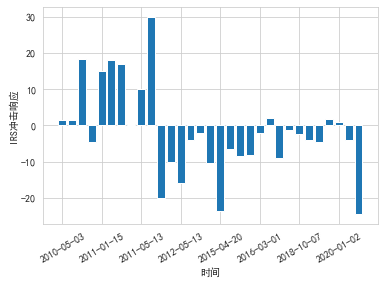

In [38]:
one_day=datetime.timedelta(days=1)






new_rrr_time=adjusted_time(rrr_time,threshold='15:00:00')
irs_change(new_rrr_time);


In [39]:
new_rrr_time;

[{'LR': 13}, {'LPR': 21}, {'SLO': 24}, {'Repo': 55}, {'SLF': 10}, {'MLF': 15}, {'RRR': 33}, {'Report': 46}, {'Meeting': 46}]


# 处理央行货币政策执行报告


In [43]:
df_report=pd.read_excel(input_path+'央行货币政策执行报告.xlsx')
df_meeting=pd.read_excel(input_path+'央行货币政策执行报告.xlsx',sheet_name='例会')
df_meeting['发布时间'].head()
df_report['发布时间'].head()
report_time=adjusted_time(df_report['发布时间'])
meeting_time=adjusted_time(df_meeting['发布时间'])


[{'LR': 13}, {'LPR': 21}, {'SLO': 24}, {'Repo': 55}, {'SLF': 10}, {'MLF': 15}, {'RRR': 33}, {'Report': 46}, {'Meeting': 46}]


# 计算IRS冲击响应


In [44]:
irs=pd.read_excel(input_path+'IRS_ALL.xlsx',index_col=0)
irs.index=pd.DatetimeIndex(irs.index)
irs

,收盘价
日期,
2010-04-19,2.1900
2010-04-20,2.1600
2010-04-21,2.1500
2010-04-22,2.1300
2010-04-23,2.1300
...,...
2020-09-24,2.4275
2020-09-25,2.4625
2020-09-28,2.4400


In [45]:
# change=pd.DataFrame(index=pd.Series(get_time_list(df_time.iloc[:,7:12]))[pd.Series(get_time_list(df_time.iloc[:,7:12]))>'2010-04-19'],columns=['t1','t0','irs1','irs0'])
# for one in change.index:
#     print(one)
#     if one in list(map(lambda x : str(x)[:10],irs.index)):


# 处理其他货币政策数据
## 希望全部处理成 after_close=False，即变动日期表示**当日交易时段**发生变动

after_close：默认为True，表示货币政策公布时点为当日收盘后



In [46]:
irs.index;

In [47]:

def irs_change(new_rrr_time:str,output=True,after_close=False):
    """
    输入时间数据，返回IRS冲击响应
    output: 是否绘图
    after_close：默认为False，表示货币政策公布时点为当日收盘后
    """
    change=pd.DataFrame(index=pd.Series(new_rrr_time)[pd.Series(new_rrr_time)>'2010-04-19'],columns=['t1','t0','irs1','irs0'])
    
    
    ## 重大bug!!,下面的if循环！！，之前的文件里，change的index格式为datetime，此处为str，已经修正为适合str
    
    
#     print(change)
    for one in change.index:
        # 当天收盘后才公布IRS,如果当天存在（为交易日）则当天收盘价为初始irs
        if after_close:
            if one in list(map(lambda x : str(x)[:10],irs.index)):  ## 这里IRS的index处理成str，否则无法匹配
                t0=one
                irs0=irs['收盘价'][one]
            # 否则前一天为初始irs
            else:
                t0=irs[irs.index<one].index.max()
                irs0=irs['收盘价'][t0]
            # 冲击后irs为后一天irs
            t1=(irs[irs.index>one].index.min())
            irs1=irs['收盘价'][t1]
            
        else: # 在当日交易中公布的信息
            if one in list(map(lambda x : str(x)[:10],irs.index)):
                t1=one
                irs1=irs['收盘价'][one]
            # 否则前一天为初始irs
            else:
                t1=irs[irs.index>one].index.min()
                irs1=irs['收盘价'][t1]
            # 冲击后irs为后一天irs
            t0=(irs[irs.index<one].index.max())
            irs0=irs['收盘价'][t0]
        
        t0,t1=str(t0)[:10],str(t1)[:10]
        ###
#         print(one,t1,t0,irs1,irs0)
        
        change.loc[one]=[t1,t0,irs1,irs0]
#         change.loc[one]=[1,2,3,4]

    change['irs_change']=change['irs1']-change['irs0']
    
    if output:
    
        import re
        # x=df['公布时间'].apply(lambda x:re.sub('[^\x00-\xff]','-',x)[:-1])
    #     x=new_rrr_time
        # plt.figure(figsize=(10,7))
        plt.bar(change.index,change['irs_change']*100)
        plt.xticks(rotation=30)


        # 下面部分为设置坐标轴刻度显示密度
        from matplotlib.pyplot import MultipleLocator

        show_inter=int(len(change)/10)+1

        x_major_locator=MultipleLocator(show_inter)
        #把x轴的刻度间隔设置为1，并存在变量里
    #     y_major_locator=MultipleLocator(10)
        ax=plt.gca()
        #ax为两条坐标轴的实例
        ax.xaxis.set_major_locator(x_major_locator)
        #把x轴的主刻度设置为1的倍数
    #     ax.yaxis.set_major_locator(y_major_locator)
        #把y轴的主刻度设置为10的倍数


        plt.xlabel('时间')
        plt.ylabel('IRS冲击响应')

        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        plt.show()
    return change

# irs_change(['2011-01-01','2013-02-03','2013-02-04','2013-02-05'])['irs_change'].std()

In [48]:
# for k,v  in dic.items():
#     print(k)
#     time_list=list(map(lambda x:str(x)[:10] ,v.index.tolist()))
#     print(time_list)

In [49]:
# change_time_df=df_time.iloc[:,22:23]
# time_list=(get_time_list(change_time_df))
# time_list

In [59]:
# 此处添加一个，若当日收盘前变化则记为0，当日收盘后变化记为1
range_dic={
'LR':[0,1],
'LPR':[3,4],
'SLO':[15,16],
'Repo':[7,11],
'SLF':[12,14],
'MLF': [17,20],
# 'Note': [22,22] # 只要22（一年期） ，此前为21,23
}


def get_time_list(change_time_df):
    time2list=list(map(lambda x:str(x)[:10] ,np.array(change_time_df).reshape(-1)))
    time2list=list(set(time2list))
    if 'NaT' in time2list:
        time2list.remove('NaT')
    time2list.sort()
    return time2list


"""
LR为前一天晚上19:00发布，0
LPR为当天发早上9:30发布，0
SLO为当日17:10,1=============
Repo当日早上，0
SLF：同repo,0
MLF:同Repo，0
Note
"""
# SLO发布时间为当日收盘后，需要将其日期往后挪一天
def delay_date(date_list:list):
    new_date_list=[]
    one_day=datetime.timedelta(days=1)
    for one in date_list:
        # 修改为下一日的数据
        one_time=(datetime.datetime.strptime(one,'%Y-%m-%d'))
        new_date=str(one_time+one_day)[:10]
        new_date_list.append(new_date)
    return new_date_list



    
#     irs_change(time_list)


LR
LPR
SLO
Repo
SLF
MLF


## 合并时间字典

In [60]:
time_list_dic={}

for k,v in range_dic.items():
    print(k)
    change_time_df=df_time.iloc[:,v[0]:v[1]+1]
    time_list=(get_time_list(change_time_df))
    
    # 调整SLO时间
    if k=='SLO':
        time_list=delay_date(time_list)
    # 存储时间
    time_list_dic[k]=time_list

    
time_list_dic['RRR']=new_rrr_time
time_list_dic['Report']=report_time
time_list_dic['Meeting']=meeting_time


print([{k:len(v)} for k,v in time_list_dic.items()])
time_list_dic;

LR
LPR
SLO
Repo
SLF
MLF
[{'LR': 13}, {'LPR': 21}, {'SLO': 24}, {'Repo': 55}, {'SLF': 10}, {'MLF': 15}, {'RRR': 33}, {'Report': 46}, {'Meeting': 46}]


# !!各个货币政策的最大最小和平均

In [61]:
def mean_min_max(irs_change):
    abss=np.abs(irs_change)
    return '样本数：{} {:6f} {:6f} {:6f} {:6f}'.format(len(irs_change),abss.mean(),abss.min(),abss.max(),irs_change.std())
    

# for k,v in range_dic.items():
#     print(k,end=' ')
#     change_time_df=df_time.iloc[:,v[0]:v[1]+1]
#     time_list=(get_time_list(change_time_df))
# #     print(time_list)
#     print(mean_min_max(irs_change(time_list,output=False)['irs_change']))

    

## 如果考虑是在交易时段或交易时段之前公布消息

>选这个！！！

>已经进行统一，选两个都一样了

LR这个才是对的!!(前一天晚上公布，第二天修改，wind日期为第二天)

In [62]:


for k,v in time_list_dic.items():
    print(k,end=' ')
    time_list=v
#     print(time_list)
    print(mean_min_max(irs_change(time_list,output=False,after_close=False)['irs_change'])) # 增加了after_close参数


LR 样本数：13 0.103285 0.030000 0.240000 0.120768
LPR 样本数：21 0.050714 0.002500 0.240000 0.068795
SLO 样本数：24 0.058125 0.000000 0.240000 0.086621
Repo 样本数：55 0.051955 0.000000 0.240000 0.067449
SLF 样本数：10 0.052000 0.005000 0.127500 0.065651
MLF 样本数：15 0.029300 0.000000 0.127500 0.045349
RRR 样本数：31 0.091068 0.005000 0.300000 0.122344
Report 样本数：42 0.031029 0.000000 0.135000 0.043420
Meeting 样本数：41 0.032195 0.000000 0.085000 0.039976


LR 

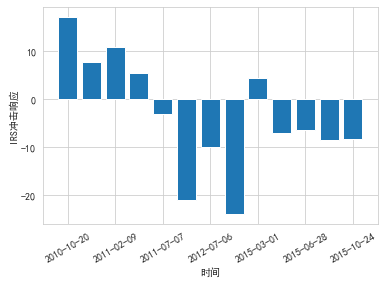

样本数：13 0.103285 0.030000 0.240000 0.120768
LPR 

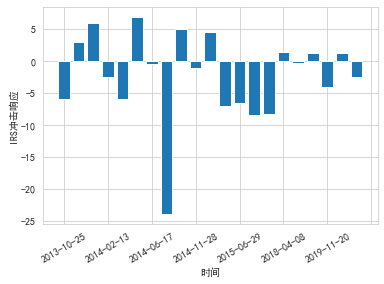

样本数：21 0.050714 0.002500 0.240000 0.068795
SLO 

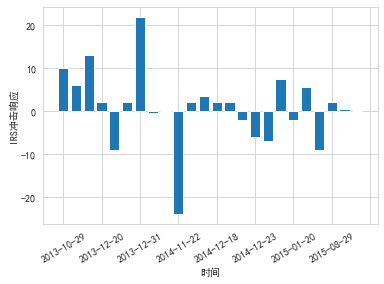

样本数：24 0.058125 0.000000 0.240000 0.086621
Repo 

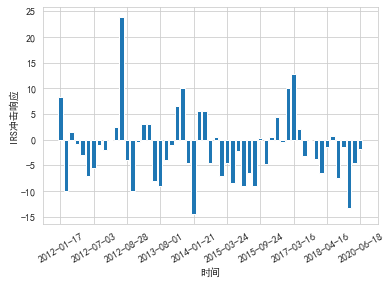

样本数：55 0.051955 0.000000 0.240000 0.067449
SLF 

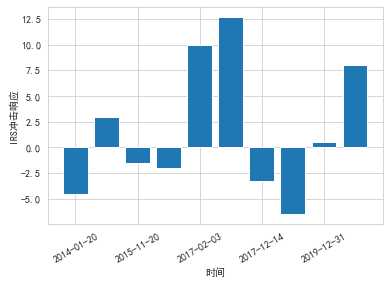

样本数：10 0.052000 0.005000 0.127500 0.065651
MLF 

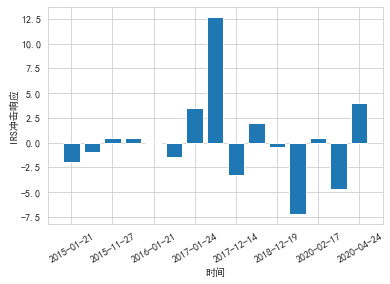

样本数：15 0.029300 0.000000 0.127500 0.045349
RRR 

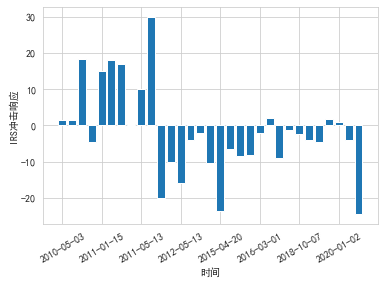

样本数：31 0.091068 0.005000 0.300000 0.122344
Report 

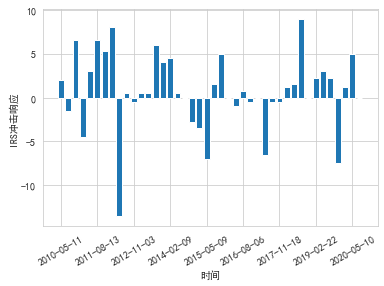

样本数：42 0.031029 0.000000 0.135000 0.043420
Meeting 

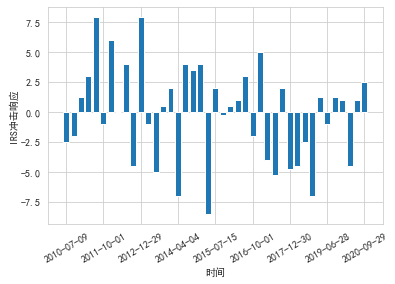

样本数：41 0.032195 0.000000 0.085000 0.039976


In [63]:

for k,v in time_list_dic.items():
    print(k,end=' ')
    time_list=v
#     print(time_list)
    print(mean_min_max(irs_change(time_list,output=True,after_close=False)['irs_change'])) # 增加了after_close参数


In [64]:
# 全部
np.abs(irs-irs.shift(1)).mean()


收盘价    0.037618
dtype: float64

计算无货币政策时的变动

In [65]:
all_time_list=[] #所有货币政策时的变动

for k,v in time_list_dic.items():
    print(k,end=' ')
    time_list=v
    all_time_list+=(time_list)


none_policy_day=list(set((irs.index).astype(str))-set(all_time_list))
none_policy_day.sort()
print(mean_min_max(irs_change(none_policy_day,output=False,after_close=False)['irs_change'])) # 增加了after_close参数


LR LPR SLO Repo SLF MLF RRR Report Meeting 样本数：2274 0.036767 0.000000 1.340000 0.093440


In [66]:
print(mean_min_max(irs_change(list(set(all_time_list)),output=False,after_close=False)['irs_change'])) # 增加了after_close参数


样本数：231 0.050242 0.000000 0.300000 0.073075


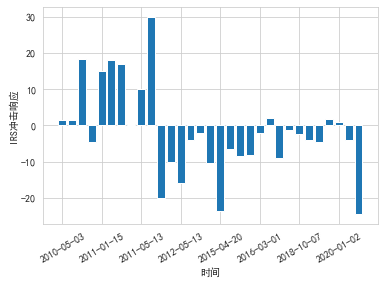

'样本数：31 0.091068 0.005000 0.300000 0.122344'

In [67]:
mean_min_max(irs_change(time_list_dic['RRR'])['irs_change'])

## 对数量型、价格型汇总来看



78


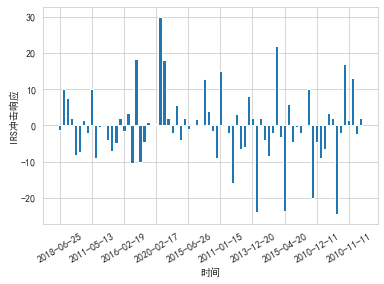

样本数：76 0.065955 0.000000 0.300000 0.095491
87


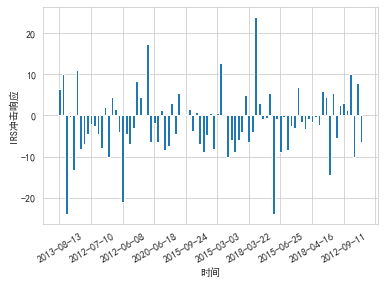

样本数：87 0.058738 0.000000 0.240000 0.077140
92


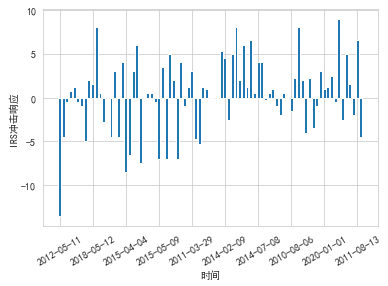

样本数：83 0.031605 0.000000 0.135000 0.041692


In [68]:
shuliang=time_list_dic['RRR']+time_list_dic['SLO']+time_list_dic['SLF']+time_list_dic['MLF']
jiage=time_list_dic['LR']+time_list_dic['LPR']+time_list_dic['Repo']
yuqi=time_list_dic['Report']+time_list_dic['Meeting']

for one in [shuliang,jiage,yuqi]:
    print(len(set(one)))
    print(mean_min_max(irs_change(list(set(one)))['irs_change']))

# 债券市场响应

In [69]:
# 用作一个格式参考，使用report 数据
RRR_time_demo=irs_change(report_time,output=False)

## 接下来进行回归，首先计算当日响应(h=0)

$$∆y_{t+h,t-1} =α_h+β_hS_t+ε_{h,t}$$

In [70]:
sov_rate=pd.read_excel(input_path+'国债收益率.xlsx',index_col=0)
sov_rate.index=pd.DatetimeIndex(sov_rate.index)
sov_rate.head()

,3m,6m,1y,3y,5y,10y
时间,,,,,,
2010-01-04,1.2372,1.4107,1.5000,2.4374,2.9584,3.6603
2010-01-05,1.2552,1.4088,1.5098,2.4591,2.9910,3.6606
2010-01-06,1.2577,1.4106,1.5238,2.4360,2.9912,3.6425
2010-01-07,1.2821,1.4126,1.5489,2.4542,3.0039,3.6543
2010-01-08,1.3221,1.4095,1.5411,2.4692,3.0340,3.6614


In [71]:
def plot_irs_bond(sov_df,irs_df):
    """
    画图，irs与债券收益率变化柱形图
    x为一列时间列表的df
    """
    plt.figure(figsize=(10,7))
    width=0.4
    xx=np.array([i for i in range(len(sov_df))])
    print(xx.shape)
    x_tick=list(map(lambda k:str(k)[:10],sov_df.index.tolist()))
    plt.bar(xx+width/2,sov_df['sov_rate_change']*100,width=width)

#     y=df['调整幅度']
    plt.bar(xx-width/2,irs_df['irs_change']*100,width=width)

    plt.legend(['国债收益率变化','IRS利率变化'])
    plt.xticks(xx,x,rotation=90)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    plt.show()

In [72]:
def get_sov(RRR_time,tenor='3m',draw=True,sov_rate=sov_rate):
    """
    tenor为期限
    RRR_time为df格式的时间+irs变动列表
    获得债券收益率的变化
    """

        
    sov=pd.DataFrame(index=RRR_time['2010-04-19':].index,columns=['t1','t0','sov_rate1','sov_rate0'])
    for one in sov.index:
        # 与之前类似，如果当天为交易日，则本日收盘价为冲击前利率
        if one in sov_rate.index.tolist():
            t0=one
            sov_rate0=sov_rate[tenor][one]
        else:
            t0=sov_rate[sov_rate.index<one].index.max()
            sov_rate0=sov_rate[tenor][t0]
        t1=(sov_rate[sov_rate.index>one].index.min())
        sov_rate1=sov_rate[tenor][t1]

        sov.loc[one]=t1,t0,sov_rate1,sov_rate0
    sov['sov_rate_change']=sov['sov_rate1']-sov['sov_rate0']
    
    if draw:
        plot_irs_bond(sov,RRR_time)
        pass
    sov_and_irs=pd.concat([sov['sov_rate_change'],RRR_time['irs_change']],axis=1)
    return sov_and_irs
      
sov_and_irs=get_sov(RRR_time=RRR_time_demo,draw=False)
sov_and_irs.head()

,sov_rate_change,irs_change
2010-05-11,-0.0041,0.02
2010-08-06,-0.0143,-0.015
2010-11-03,0.0272,0.0657
2011-01-31,-0.0682,-0.045
2011-05-04,0.0006,0.03


In [73]:
import statsmodels.api as sm

def reg(sov_and_irs_):
    # 主权债收益率变化为y，irs变化为x
    Y,X=np.array(sov_and_irs_['sov_rate_change'].tolist()),np.array(sov_and_irs_['irs_change'].tolist())
    X=sm.add_constant(X)
    mod=sm.OLS(Y,X)
    res=mod.fit()
    coef,p,t=res.params[1],res.pvalues[1],res.tvalues[1]
    #print(coef,p)
#     return res.summary()
    return coef,p,t
reg(sov_and_irs)

(0.8819302812588182, 6.56595454115501e-05, 4.456517292762167)

/## 下面计算仍考虑当日或前一日公布消息

In [92]:
def cal_and_reg(time_list,name='RRR',after_close=False,bond_rate=sov_rate):
    irs_bp=irs_change(time_list,after_close=after_close,output=False)
    tenor_list=['3m','6m','1y','3y','5y','10y']
    est_result=pd.DataFrame(index=tenor_list,columns=[name,'P_value','T'])
    for tenor in tenor_list:
        sov=get_sov(irs_bp,tenor=tenor,draw=False,sov_rate=bond_rate)
        coef,p,t=reg(sov)
        est_result.loc[tenor]=[coef,p,t]
    return est_result
     
oneday_res_dict={}

for k,v in time_list_dic.items():
    print(k)
    time_list=v
    res=cal_and_reg(time_list,name=k,after_close=False,bond_rate=sov_rate)
    oneday_res_dict[k]=res
#     print(res)

LR
LPR
SLO
Repo
SLF
MLF
RRR
Report
Meeting


In [93]:
shuliang=['RRR','SLO','SLF','MLF']
jiage=['LR','LPR','Repo']
yuqi=['Report','Meeting']
all_policy=shuliang+jiage+yuqi


def oneday_add_star(df):
    coef_list=[]
    t_list=[]
    for year,line in df.iterrows():
        coef=str(round(line[0],2))
        p=line[1]
        t='('+str(round(line[2],2))+')'
        if p<0.01:
            coef+='***'
        elif p<0.05:
            coef+='**'
        elif p<0.1:
            coef+='*'
        else:
            coef+=''
        coef_list.append(coef)
        t_list.append(t)
    print('	'.join(coef_list))
    print('	'.join(t_list))

for one in all_policy:
#     print(one)
    (oneday_add_star(oneday_res_dict[one]))
    

0.78***	0.76***	0.79***	0.46***	0.44***	0.35***
(8.09)	(6.42)	(8.71)	(6.41)	(6.24)	(6.35)
0.38*	0.33*	0.53***	0.38***	0.42***	0.47***
(1.73)	(1.91)	(2.92)	(4.46)	(4.67)	(4.04)
0.73***	0.57***	0.75**	0.48**	0.39*	0.34
(4.19)	(4.7)	(3.0)	(3.05)	(2.26)	(1.56)
0.29	0.34	-0.01	0.17	0.17	0.09
(0.45)	(0.84)	(-0.02)	(0.5)	(0.53)	(0.25)
0.25	0.39***	0.57***	0.67***	0.7***	0.67***
(1.49)	(3.55)	(6.37)	(4.44)	(4.21)	(6.04)
0.32	0.57***	0.75***	0.4**	0.47***	0.41***
(1.16)	(3.01)	(4.13)	(2.51)	(3.59)	(3.87)
0.5***	0.62***	0.54***	0.52***	0.46***	0.28***
(3.73)	(4.54)	(5.41)	(5.3)	(4.95)	(2.91)
0.88***	1.01***	0.84***	0.73***	0.8***	0.53***
(4.46)	(5.57)	(6.18)	(6.79)	(5.47)	(4.65)
0.75**	0.08	0.23	0.37***	0.32***	0.34***
(2.22)	(0.36)	(1.29)	(2.89)	(2.87)	(3.44)


In [78]:
# cal_and_reg(report_time,after_close=True)

# 扩展到非利率债

In [79]:
df_credit=pd.read_excel(input_path+'0228_中债中短期票据收益率曲线.xls',index_col=0).iloc[1:-2]
df_credit.index=pd.DatetimeIndex(df_credit.index)
df_credit['2010':'2020']
credit_note=df_credit['2010':'2020'].iloc[:,:6]
credit_cor=df_credit['2010':'2020'].iloc[:,6:]
credit_note.columns='3m	6m	1y	3y	5y	10y'.split('	')
credit_cor.columns='3m	6m	1y	3y	5y	10y'.split('	')

Text(0, 0.5, '到期收益率（%）')

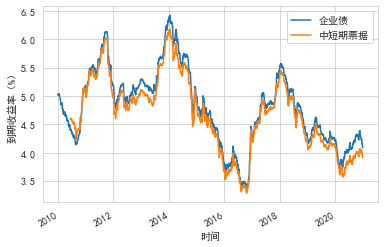

In [80]:
credit_cor.iloc[:,-1].plot()
credit_note.iloc[:,-1].plot()
plt.legend(['企业债','中短期票据'])
plt.xlabel('时间')
plt.ylabel('到期收益率（%）')

In [81]:
for k,v in time_list_dic.items():
    print(k)
    time_list=v
    res=cal_and_reg(time_list,name=k,after_close=False,bond_rate=sov_rate)
    oneday_res_dict[k]=res
#     print(res)

for one in all_policy:
#     print(one)
    (oneday_add_star(oneday_res_dict[one]))
    

指标名称
2010-06-11       4.6
2010-06-12    4.5925
2010-06-13    4.5935
2010-06-17    4.5958
2010-06-18       4.6
               ...  
2020-12-25     3.967
2020-12-28     3.952
2020-12-29    3.9171
2020-12-30    3.9071
2020-12-31    3.9103
Name: 10y, Length: 2642, dtype: object

## 下面计算仍考虑当日或前一日公布消息

In [82]:
def cal_and_reg(time_list,name='RRR',sov_rate=credit_note):
    irs_bp=irs_change(time_list,after_close=False,output=False)
    tenor_list=['3m','6m','1y','3y','5y','10y']
    est_result=pd.DataFrame(index=tenor_list,columns=[name,'P_value','T'])
    for tenor in tenor_list:
        sov=get_sov(irs_bp,tenor=tenor,draw=False,sov_rate=sov_rate)
        coef,p,t=reg(sov)
        est_result.loc[tenor]=[coef,p,t]
    return est_result
     

In [113]:
for k,v in range_dic.items():
    print(k)
    change_time_df=df_time.iloc[:,v[0]:v[1]+1]
    time_list=(get_time_list(change_time_df))
    res=cal_and_reg(time_list,name=k)
    print(res)

LR
           LR      P_value        T
3m   0.417703    0.0056094  3.43138
6m   0.505618   0.00696167  3.30934
1y   0.592354   0.00166051  4.13411
3y   0.735702   3.4421e-05   6.6856
5y    0.89158  3.00039e-05  6.78824
10y  0.705606  6.41125e-06  8.01574
LPR
          LPR      P_value        T
3m   0.741761   0.00869981  2.92436
6m    0.53897    0.0630738  1.97423
1y   0.671745    0.0172172  2.60991
3y   0.676028   0.00122454  3.79468
5y   0.829137  0.000302528  4.40748
10y  0.556456  3.70347e-05  5.34463
SLO
          SLO     P_value         T
3m    1.71216  0.00437746   3.17549
6m    1.03752   0.0320944   2.28826
1y    0.86547   0.0161526   2.60536
3y   0.173012    0.555705  0.598369
5y   0.471646   0.0885123   1.78228
10y   0.46487   0.0349812   2.24729
Repo
         Repo      P_value        T
3m   0.717859  1.96754e-05  4.68841
6m   0.576455  6.47709e-05   4.3382
1y   0.552373  0.000124593  4.14124
3y   0.372606   0.00119414  3.42505
5y   0.454065  0.000365937  3.80775
10y  0.28437

In [95]:
# cal_and_reg(report_time);

In [86]:
# rrr_time=['2010-01-12',
#  '2010-02-12',
#  '2010-05-02',
#  '2010-11-10',
#  '2010-11-19',
#  '2010-12-10',
#  '2011-01-14',
#  '2011-02-18',
#  '2011-03-18',
#  '2011-04-17',
#  '2011-05-12',
#  '2011-06-14',
#  '2011-11-30',
#  '2012-02-18',
#  '2012-05-12',
#  '2014-04-22',
#  '2014-06-09',
#  '2015-02-04',
#  '2015-04-19',
#  '2015-06-27',
#  '2015-08-25',
#  '2015-10-23',
#  '2016-02-29',
#  '2017-09-30',
#  '2018-04-17',
#  '2018-06-24',
#  '2018-10-06',
#  '2019-01-04',
#  '2019-05-05',
#  '2019-09-06',
#  '2020-01-01',
#  '2020-03-13',
#  '2020-04-03']

In [87]:
cal_and_reg(rrr_time)

,RRR,P_value,T
3m,0.650396,1.1811e-07,6.96277
6m,0.647526,7.29788e-07,6.28561
1y,0.673834,1.42296e-08,7.77429
3y,0.416732,8.22653e-07,6.24162
5y,0.390791,3.07142e-07,6.60532
10y,0.320117,1.49707e-07,6.87363


In [117]:
# time_list_dic={}

# for k,v in range_dic.items():
#     print(k)
#     change_time_df=df_time.iloc[:,v[0]:v[1]+1]
#     time_list=(get_time_list(change_time_df))
#     irs_change_df=irs_change(time_list,output=False)
#     time_list_dic[k]=irs_change_df['irs_change']
# #     print(res)
# time_list_dic

## 接下来我们将一日响应扩大到多日响应


In [118]:
def get_sov_nday(RRR_time=RRR_time_demo,days=1,tenor='3m',draw=True,sov_rate=credit_cor):
    """
    tenor为期限
    RRR_time为df格式的时间+irs变动列表
    获得债券收益率的变化
    """

        
    sov=pd.DataFrame(index=RRR_time['2010-04-19':].index,columns=['t1','t0','sov_rate1','sov_rate0'])
    for one in sov.index:
        # 与之前类似，如果当天为交易日，则本日收盘价为冲击前利率
        if one in sov_rate.index.tolist():
            t0=one
            sov_rate0=sov_rate[tenor][one]
        else:
            t0=sov_rate[sov_rate.index<one].index.max()
            sov_rate0=sov_rate[tenor][t0]
            
        t1=(sov_rate[sov_rate.index>one].index[days-1]) #主要修改了这里，n日响应对应index的n-1
        sov_rate1=sov_rate[tenor][t1]

        sov.loc[one]=t1,t0,sov_rate1,sov_rate0
    sov['sov_rate_change']=sov['sov_rate1']-sov['sov_rate0']
    
    if draw:
        plot_irs_bond(sov,RRR_time)
        pass
    sov_and_irs=pd.concat([sov['sov_rate_change'],RRR_time['irs_change']],axis=1)
    return sov_and_irs
      
# sov_n=get_sov_nday(tenor='3m',days=1)
# sov_n;

In [119]:
# RRR_time_demo

In [120]:
# def get_sov_nday(RRR_time=RRR_time_demo,days=1,tenor='3m',draw=True,sov_rate=sov_rate):
#     sov=pd.DataFrame(index=RRR_time['2010-04-19':].index,columns=['t1','t0','sov_rate1','sov_rate0'])

#     for one in sov.index:
#         if one in sov_rate.index.tolist():
#             t0=one
#             sov_rate0=sov_rate[tenor][one]
#         else:
#             t0=sov_rate[sov_rate.index<one].index.max()
#             sov_rate0=sov_rate[tenor][t0]
            
#         t1=(sov_rate[sov_rate.index>one].index[days-1]) #主要修改了这里，n日响应对应index的n-1
#         sov_rate1=sov_rate[tenor][t1]

#         sov.loc[one]=t1,t0,sov_rate1,sov_rate0
#     sov['sov_rate_change']=sov['sov_rate1']-sov['sov_rate0']
#     return sov
# sov_n=get_sov_nday(tenor='3m',days=1)
# sov_n;

In [123]:
def get_one_policy(irs_change_df,sov_rate=credit_cor):
    """
    一个货币政策对多个期限的冲击
    """
    tenor_list=['3m','6m','1y','3y','5y','10y']
    # 1-7天的冲击
    day_list=[i for i in range(1,8)]
    est_result_nday=pd.DataFrame(index=tenor_list,columns=day_list)
    for tenor in tenor_list:
        for day in day_list:
            print('.',end='')
            sov=get_sov_nday(RRR_time=irs_change_df,sov_rate=sov_rate,tenor=tenor,days=day,draw=False) # 多日主权债收益率变化
            coef,p,t=reg(sov) #主权债收益率变化与irs变化回归
            est_result_nday.loc[tenor,day]=coef # 放入df中
        print(tenor)
    return est_result_nday

# get_one_policy('')

In [124]:
res_dic={}


print('运行时间有点久！')
for k,v in range_dic.items():
    print(k)
    change_time_df=df_time.iloc[:,v[0]:v[1]+1]
    time_list=(get_time_list(change_time_df))
    irs_change_df=irs_change(time_list,after_close=False,output=False)
    res=get_one_policy(irs_change_df)
    res_dic[k]=res
#     print(res)
    

运行时间有点久！
LR
.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
LPR
.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
SLO
.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
Repo
.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
SLF
.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
MLF
.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
Note
.......3m
.......6m
.......1y
.......3y
.......5y
.......10y


In [125]:
# 货币政策报告
time_list=report_time
irs_change_df=irs_change(time_list,output=False)
report_res=get_one_policy(irs_change_df)
print(report_res)

.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
            1         2         3         4        5        6        7
3m   0.669582   1.59351   1.89058   2.52198  3.16509  3.65652  3.75128
6m   0.270058  0.915523  0.977093   1.32029  1.51825  1.66415  1.77367
1y   0.426978  0.959213  0.899924   1.41344  1.54617  1.71744  1.83321
3y   0.703914   1.14538   1.20385   1.53846  1.74813   1.9901  2.25886
5y   0.606797   1.12552   1.29673   1.53829   1.6933  1.92648  2.04491
10y  0.332745   0.55885  0.717924  0.908704  1.04485  1.14595  1.27611


In [126]:
res_dic['Report']=report_res

In [127]:
# RRR
time_list=rrr_time
irs_change_df=irs_change(time_list,output=False)
rrr_res=get_one_policy(irs_change_df)
print(rrr_res)

.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
            1         2         3         4         5         6         7
3m   0.735722  0.959907   1.14394    1.8744   1.97863   2.09694   2.32282
6m    0.73095  0.988256   1.14178   1.22032   1.21313    1.2368   1.35343
1y     0.6639  0.930451   1.09427    1.1876   1.20725   1.23146   1.31254
3y   0.499762  0.684109  0.768128  0.788719  0.840387  0.870424  0.926834
5y    0.44617  0.619288  0.696791  0.703199  0.741396  0.775187  0.824883
10y  0.361757  0.503134  0.518634   0.52076  0.526299  0.540911  0.588738


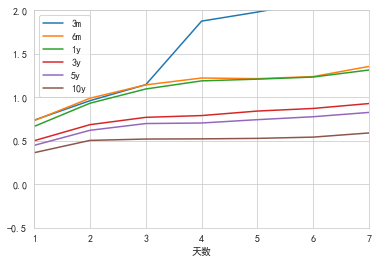

In [128]:
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def draw_nday(est_result_nday,xlabel='天数'):

#     plt.figure(figsize=(7,4))
    plt.plot(est_result_nday.T)
    # plt.title('货币政策意(执行报告)外对于各期限国债收益率的影响',size=20)
    plt.legend(est_result_nday.index)
    # plt.grid()
    plt.xlabel(xlabel)
#     plt.ylabel('债券响应系数')

    plt.xlim(1,7)
    plt.ylim(-0.5,2)
#     plt.show()
draw_nday(rrr_res)

In [129]:
res_dic;

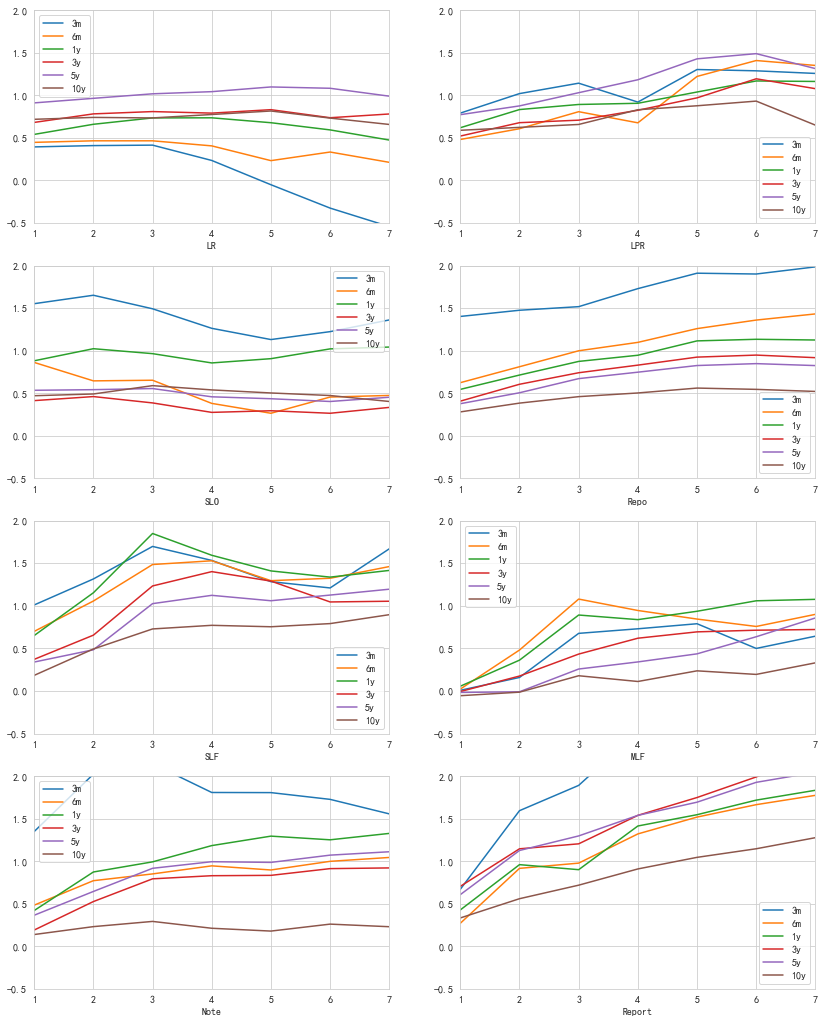

In [130]:
i=1
plt.figure(figsize=(14,18))
for k,v in res_dic.items():
    plt.subplot(4,2,i)
    draw_nday(v,xlabel=k)
    i+=1
plt.savefig('货币政策冲击.svg')

# 转变为月度数据


In [ ]:
year_index=[]
for year in range(2010,2021):
    for month in range(1,13):
        year_index.append('{}-{}'.format(year,str(month).zfill(2)))


def get_month_line(irs_one):
    # 新建一个df
    month_df=pd.DataFrame(index=year_index)
    # 计算月度累计
#     irs_one=irs_change(v,output=False)
    irs_one.index=pd.DatetimeIndex(irs_one.index)
    for month in month_df.index:
        try:
            one_month_change=irs_one[month]['irs_change'].sum()
        except:
            one_month_change=0
        month_df.loc[month,'this']=one_month_change
    return month_df


def get_half_month_line(irs_one):
    # 新建一个df
    month_df=pd.DataFrame(index=year_index)
    # 计算月度累计
#     irs_one=irs_change(v,output=False)
    irs_one.index=pd.DatetimeIndex(irs_one.index)
    for i,month in enumerate(month_df.index):
        try:
            one_month_change=irs_one[month_df[i-1]+'-15':month+'-15']['irs_change'].sum()
        except:
            one_month_change=0
        month_df.loc[month,'this']=one_month_change
    return month_df

In [ ]:
pd.Series(v.index.tolist())>'2010-04-19'

In [ ]:

def irs_change(new_rrr_time:str,output=True,after_close=True):
    """
    输入时间数据，返回IRS冲击响应
    after_close：默认为True，表示货币政策公布时点为当日收盘后
    """
    change=pd.DataFrame(index=pd.Series(new_rrr_time)[pd.Series(new_rrr_time)>'2010-04-19'],columns=['t1','t0','irs1','irs0'])
    
    
    ## 重大bug!!,下面的if循环！！，之前的文件里，change的index格式为datetime，此处为str，已经修正为适合str
    
    
#     print(change)
    for one in change.index:
        # 当天收盘后才公布IRS,如果当天存在（为交易日）则当天收盘价为初始irs
        if after_close:
            if one in list(map(lambda x : str(x)[:10],irs.index)):
                t0=one
                irs0=irs['收盘价'][one]
            # 否则前一天为初始irs
            else:
                t0=irs[irs.index<one].index.max()
                irs0=irs['收盘价'][t0]
            # 冲击后irs为后一天irs
            t1=(irs[irs.index>one].index.min())
            irs1=irs['收盘价'][t1]
        else: # 在当日交易中公布的信息
            if one in list(map(lambda x : str(x)[:10],irs.index)):
                t1=one
                irs1=irs['收盘价'][one]
            # 否则前一天为初始irs
            else:
                t1=irs[irs.index>one].index.min()
                irs1=irs['收盘价'][t1]
            # 冲击后irs为后一天irs
            t0=(irs[irs.index<one].index.max())
            irs0=irs['收盘价'][t0]
        
        t0,t1=str(t0)[:10],str(t1)[:10]
#         print(one,t1,t0,irs1,irs0)
        
        change.loc[one]=[t1,t0,irs1,irs0]
#         change.loc[one]=[1,2,3,4]

    change['irs_change']=change['irs1']-change['irs0']
    
    return change

# irs_change(['2011-01-01','2013-02-03'])['irs_change'].std()

In [ ]:
# 新建一个all_month_df

all_month_df=pd.DataFrame(index=year_index)


for k,v in time_list_dic.items():
    print(k)
    if k!='RRR' or k!='Report':
        irs_one=(irs_change(v,output=False))
    else:
        irs_one=irs_change(v,output=False,after_close=False)
    all_month_df[k]=get_month_line(irs_one)
    
all_month_df=all_month_df['2010-07':'2020-06']
all_month_df

In [ ]:
def get_half_month_line(irs_one):
    # 新建一个df
    month_df=pd.DataFrame(index=year_index)
    # 计算月度累计
#     irs_one=irs_change(v,output=False)
    irs_one.index=pd.DatetimeIndex(irs_one.index)
    for i,month in enumerate(month_df.index):
        try:
            if i==0:
                one_month_change=irs_one[month_df.index[i]+'-01':month+'-15']['irs_change'].sum()
            else:
                one_month_change=irs_one[month_df.index[i-1]+'-15':month+'-15']['irs_change'].sum()
        except Exception as e:
            traceback.print_exc()
            break
            one_month_change=0
        month_df.loc[month,'this']=one_month_change
    return month_df
get_half_month_line(irs_one)

In [ ]:
# 新建一个all_month_df
import traceback
all_half_month_df=pd.DataFrame(index=year_index)


for k,v in time_list_dic.items():
    print(k)
    if k!='RRR' or k!='Report':
        irs_one=(irs_change(v,output=False))
    else:
        irs_one=irs_change(v,output=False,after_close=False)
    all_half_month_df[k]=get_half_month_line(irs_one).iloc[:,0].tolist()
    
all_half_month_df=all_half_month_df['2010-07':'2020-06']

In [ ]:
all_half_month_df

In [ ]:
all_half_month_df.to_excel('VAR_半月_程序输出.xlsx')

In [ ]:
all_month_df.to_excel('VAR_一月_程序输出.xlsx')

In [ ]:
from statsmodels.tsa.stattools import adfuller

for one in all_month_df.columns:
    if one[:2]=='d_':
        continue
    p_value=(adfuller(all_month_df[one])[1])
    print(one,round(p_value,9))

#     if p_value>0.1:
#         cpi['d_'+one]=cpi[one]-cpi[one].shift(1)
#     else:
# #         print(one)
#         pass
# cpi=cpi.dropna()
# cpi

In [ ]:
# all_month_df.to_excel('初始_VAR用_货币政策月度.xlsx')

In [ ]:
all_half_month_df.sum(axis=1).rolling(10).mean().plot()

In [ ]:
irs['2010':'2020-06'].plot()


In [ ]:
lr_change=lr-lr.shift(1)
lr_change

In [ ]:
lr_time=list(map(lambda x:str(x)[:10],lr_change.index.tolist()))
a=irs_change(lr_time)['irs_change']

In [ ]:
lr_change['irs_change']=a
lr_change.columns=['存款基准利率变化','IRS变化']

In [ ]:
lr_change[['IRS变化','存款基准利率变化']][1:].plot.bar()
plt.xlabel('时间')

x_tick=list(map(lambda x:str(x)[:10],lr_change[1:].index.to_list()))
plt.xticks(x_tick)
plt.show()

## 汇总结果


In [ ]:
tot_time_list=[]
for k,v in time_list_dic.items():
    tot_time_list+=v.index.to_list()
tot_time_list+=new_rrr_time
tot_time_list+=report_time
tot_time_list=list(set(tot_time_list))
tot_time_list.sort()
tot_time_list[:10]

In [ ]:
sov_rate

In [142]:
def cal_and_reg(time_list,name='RRR',sov_rate=credit_note):
    irs_bp=irs_change(time_list,output=False)
    tenor_list=['3m','6m','1y','3y','5y','10y']
    est_result=pd.DataFrame(index=tenor_list,columns=[name,'P_value'])
    for tenor in tenor_list:
        sov=get_sov(irs_bp,tenor=tenor,draw=False,sov_rate=sov_rate)
        coef,p=reg(sov)
        est_result.loc[tenor]=[coef,p]
    return est_result
     
res=cal_and_reg(tot_time_list,sov_rate=sov_rate)
res

,RRR,P_value
3m,0.540045,1.62974e-11
6m,0.549835,5.8967e-15
1y,0.599402,9.50893e-19
3y,0.473746,1.9781e-20
5y,0.482935,6.10024e-19
10y,0.412148,4.86014e-19


In [143]:
res2=cal_and_reg(tot_time_list,sov_rate=credit_cor)
res2

,RRR,P_value
3m,0.710654,5.0232e-07
6m,0.551643,3.66139e-13
1y,0.521376,6.45293e-14
3y,0.456676,1.60475e-14
5y,0.438786,5.0533e-12
10y,0.358596,4.97254e-14


In [144]:
res2=cal_and_reg(tot_time_list,sov_rate=credit_note)
res2

,RRR,P_value
3m,0.520569,3.84288e-09
6m,0.597697,1.86009e-14
1y,0.483585,4.05472e-12
3y,0.471895,1.00956e-14
5y,0.494706,1.90882e-15
10y,NaN,NaN


# 以下部分运行较慢，有数据输出最好可以用现有的数据

In [157]:
import matplotlib.pyplot.xlabel as plt.xlabel
plt.xlabel

SyntaxError: invalid syntax (<ipython-input-157-2ddeec649fa6>, line 1)

.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
            1         2         3         4         5         6         7
3m   0.540045  0.796259   0.94039   1.01073   1.04339    1.1056   1.13617
6m   0.549835  0.791581  0.896287  0.946149    1.0203   1.07969   1.11854
1y   0.599402  0.907224    0.9963   1.02712   1.12895   1.16395   1.12866
3y   0.473746  0.676557  0.731816   0.72865  0.748872  0.817874  0.796938
5y   0.482935  0.696847   0.73521  0.706758  0.723541  0.776472  0.732716
10y  0.412148  0.498783  0.500764  0.461439  0.474173  0.520279  0.497128


TypeError: 'list' object is not callable

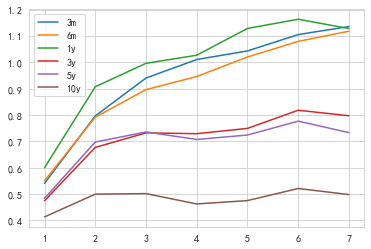

In [162]:
# RRR
irs_change_df=irs_change(tot_time_list,output=False)
rrr_res=get_one_policy(irs_change_df,sov_rate=sov_rate)
print(rrr_res)
draw_nday(rrr_res)

In [163]:
rrr_res.to_dict()

{1: {'3m': 0.5400448561014054,
  '6m': 0.5498354756019096,
  '1y': 0.5994017480763054,
  '3y': 0.4737457545912722,
  '5y': 0.482934910987283,
  '10y': 0.41214778680400016},
 2: {'3m': 0.79625900556535,
  '6m': 0.7915805195541309,
  '1y': 0.9072244131011085,
  '3y': 0.6765567593465305,
  '5y': 0.6968467859240806,
  '10y': 0.49878257678525706},
 3: {'3m': 0.9403903987924712,
  '6m': 0.8962871197078034,
  '1y': 0.9963004939342182,
  '3y': 0.7318160122104918,
  '5y': 0.735209594539104,
  '10y': 0.5007640203323449},
 4: {'3m': 1.0107268322780336,
  '6m': 0.9461488773156831,
  '1y': 1.0271231973856016,
  '3y': 0.7286495829731918,
  '5y': 0.7067579406960175,
  '10y': 0.46143850335728426},
 5: {'3m': 1.0433908508992047,
  '6m': 1.0202976485594677,
  '1y': 1.128948600238957,
  '3y': 0.7488724802369217,
  '5y': 0.7235414606832767,
  '10y': 0.4741729284027955},
 6: {'3m': 1.105599138298124,
  '6m': 1.0796921062246012,
  '1y': 1.163948810797926,
  '3y': 0.8178736937541805,
  '5y': 0.77647246527730

In [161]:
# RRR
irs_change_df=irs_change(tot_time_list,output=False)
rrr_res=get_one_policy(irs_change_df,sov_rate=credit_cor)
print(rrr_res)

.......3m
.......6m
.......1y
.......3y
.......5y
.......10y
            1         2         3         4         5         6         7
3m   0.710654    0.9272   1.15062   1.55426   1.59616   1.68574    1.8017
6m   0.551643  0.792756   0.94137   1.07244   1.06283   1.15743   1.25567
1y   0.521376  0.775459  0.927128   1.03961   1.09326   1.15635   1.20396
3y   0.456676  0.655596  0.793997  0.872801   0.93981    1.0161    1.0896
5y   0.438786  0.654617  0.774381  0.842372  0.905786   0.98862   1.02676
10y  0.358596  0.459569  0.519142  0.569023  0.600884  0.608607  0.637113


In [158]:
rrr_res.to_dict()

{1: {'3m': 0.7106543853786486,
  '6m': 0.5516430508736476,
  '1y': 0.5213761676217474,
  '3y': 0.45667633529073254,
  '5y': 0.43878634404788597,
  '10y': 0.3585964126779653},
 2: {'3m': 0.9272004940801618,
  '6m': 0.7927564805271915,
  '1y': 0.7754591133027965,
  '3y': 0.6555961720339479,
  '5y': 0.6546168184079403,
  '10y': 0.45956905694638067},
 3: {'3m': 1.1506247500589104,
  '6m': 0.9413703779214153,
  '1y': 0.9271284650455801,
  '3y': 0.7939972112165375,
  '5y': 0.7743805623540632,
  '10y': 0.5191421626303674},
 4: {'3m': 1.554264367042079,
  '6m': 1.0724355131447683,
  '1y': 1.0396146262062242,
  '3y': 0.8728013527635003,
  '5y': 0.8423716806143356,
  '10y': 0.5690226231657018},
 5: {'3m': 1.596157392825881,
  '6m': 1.062830535455036,
  '1y': 1.0932607564811267,
  '3y': 0.9398099187655395,
  '5y': 0.905785738879011,
  '10y': 0.600884053356314},
 6: {'3m': 1.6857395437364566,
  '6m': 1.1574306794459825,
  '1y': 1.1563450452262112,
  '3y': 1.01609864675797,
  '5y': 0.98862039456717

In [ ]:
# RRR
irs_change_df=irs_change(tot_time_list,output=False)
rrr_res=get_one_policy(irs_change_df)
print(rrr_res)

In [ ]:
# RRR
time_list=rrr_time
irs_change_df=irs_change(time_list,output=False)
rrr_res=get_one_policy(irs_change_df)
print(rrr_res)

In [167]:
tot_time_list
tot_irs_chg=irs_change(tot_time_list,output=False)

In [171]:
tot_irs_chg


,t1,t0,irs1,irs0,irs_change
2010-05-02,2010-05-04,2010-04-29,2.15,2.135,0.015
2010-05-10,2010-05-12,2010-05-07,2.12,2.1,0.02
2010-06-01,2010-06-02,2010-06-01,2.28,2.23,0.05
2010-06-08,2010-06-09,2010-06-08,2.28,2.23,0.05
2010-08-05,2010-08-06,2010-08-04,2.075,2.09,-0.015
...,...,...,...,...,...
2020-04-20,2020-04-21,2020-04-20,1.42,1.45,-0.03
2020-04-24,2020-04-26,2020-04-24,1.4525,1.44,0.0125
2020-05-09,2020-05-11,2020-05-08,1.525,1.475,0.05
2020-06-18,2020-06-19,2020-06-18,2.08,2.04,0.04


In [190]:
year_index=[]
for year in range(2010,2021):
    for month in range(1,13):
        year_index.append('{}-{}'.format(year,str(month).zfill(2)))


def get_month_line(irs_one):
    # 新建一个df
    month_df=pd.DataFrame(index=year_index)
    # 计算月度累计
#     irs_one=irs_change(v,output=False)
    irs_one.index=pd.DatetimeIndex(irs_one.index)
    for month in month_df.index:
        try:
            one_month_change=irs_one[month]['irs_change'].sum()
        except:
            one_month_change=0
        month_df.loc[month,'this']=one_month_change
    return month_df


In [191]:
np.array(get_month_line(tot_irs_chg).iloc[:,0].to_list())

array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.035 ,  0.1   ,  0.    ,
       -0.015 ,  0.    ,  0.0857,  0.381 , -0.0825,  0.11  ,  0.2   ,
        0.22  , -0.03  ,  0.13  ,  0.38  , -0.02  ,  0.12  ,  0.    ,
        0.    , -0.35  ,  0.    ,  0.0325, -0.02  ,  0.    ,  0.    ,
       -0.235 ,  0.085 , -0.125 ,  0.06  ,  0.225 ,  0.    , -0.005 ,
        0.    ,  0.    ,  0.005 ,  0.    ,  0.    ,  0.005 ,  0.    ,
       -0.01  ,  0.045 ,  0.    ,  0.105 ,  0.14  ,  0.3   , -0.2   ,
        0.045 ,  0.    , -0.02  ,  0.005 ,  0.0625,  0.    ,  0.    ,
        0.    ,  0.    , -0.5125,  0.    ,  0.09  , -0.14  ,  0.1375,
       -0.3925, -0.17  , -0.21  ,  0.    , -0.145 , -0.0075, -0.1975,
        0.03  ,  0.    ,  0.025 ,  0.03  ,  0.    ,  0.    , -0.01  ,
        0.    ,  0.    ,  0.0075,  0.005 ,  0.    , -0.005 ,  0.    ,
        0.13  ,  0.    ,  0.0275,  0.    , -0.065 ,  0.    ,  0.    ,
       -0.005 ,  0.02  ,  0.0325, -0.005 , -0.0175,  0.0075,  0.0125,
        0.    , -0.1

In [195]:
def get_half_month_line(irs_one):
    # 新建一个df
    month_df=pd.DataFrame(index=year_index)
    # 计算月度累计
#     irs_one=irs_change(v,output=False)
    irs_one.index=pd.DatetimeIndex(irs_one.index)
    for i,month in enumerate(month_df.index):
        print(month_df[i-1]+'-15'+month+'-15')

        try:
            one_month_change=irs_one[month_df[i-1]+'-15':month+'-15']['irs_change'].sum()
        except:
            one_month_change=0
        month_df.loc[month,'this']=one_month_change
    return month_df
np.array(get_half_month_line(tot_irs_chg).iloc[:,0].to_list())

KeyError: -1